In [1]:
#Step1: Determine temperature trends over the past 5 years

import geohash
from datetime import datetime

#Pare a lint to geohash-year, temperature
def parseLine(line):
    variables = line.split("\t")
    try:
        lat = float(variables[1])
        lon = float(variables[2])
        tem = float(variables[10])
        
        ts = int(variables[0][0: 10])
        # if you encounter a "year is out of range" error the timestamp
        # may be in milliseconds, try `ts /= 1000` in that case
        year = datetime.utcfromtimestamp(ts).strftime('%Y')
        
        gh = geohash.encode(lat, lon)
        return (gh[0: 2] + '\t' + year, tem)
    except:
        return ('', 0)
    
#text_file = spark.read.load('hdfs://orion11:21001/3hr_sample/sampled_2015/*', format='csv', sep='\t', inferSchema=True, header=True)
text_fileCC = sc.textFile("hdfs://orion11:21001/3hr_sample/*")

#(geohash-year, average_temperature)
parsed_dataCC = text_fileCC \
    .map(lambda line: parseLine(line))

#compute the average temperature of geohash-yaer. Transform or data to (geohash-year(distinct), average_temperature)
av_data = parsed_dataCC.map(lambda x: (x[0], x[1])) \
    .mapValues(lambda x: (x, 1)) \
    .reduceByKey(lambda x, y: (x[0] + y[0], x[1]+y[1])) \
    .mapValues(lambda v: (v[0] / v[1])) \
    .sortBy(lambda x: x[0], True)



In [2]:
#Parese or data to (geohash, 2015 temperature, 2016 temperature, 2017temperature, 2018 temperature, 2019 temperature)
def parseLine(line):
    try:
        key = line[0]
        value = line[1]
        
        print(key)
        print(value)
        
        variables = key.split("\t")
        year = variables[1]
        geo = variables[0]
        
        if year == '2015':
            return (geo, value, 0, 0, 0, 0)
        elif year == '2016':
            return (geo, 0, value, 0, 0, 0)
        elif year == '2017':
            return (geo, 0, 0, value, 0, 0)
        elif year == '2018':
            return (geo, 0, 0, 0, value, 0)
        elif year == '2019':
            return (geo, 0, 0, 0, 0, value)
        else:
            return ('', 0, 0, 0, 0, 0)
    except:
        return ('', 0, 0, 0, 0, 0)
    

trend_data = av_data \
    .map(lambda line: parseLine(line)) \
    .map(lambda x: (x[0], (x[1], x[2], x[3], x[4], x[5]))) \
    .reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1], x[2] + y[2], x[3] + y[3], x[4] + y[4]))

#year_data.take(100)

In [3]:
#Anser Question1: temperature trends over the past 5 years.
#Time cost: 10 min

import numpy as np
a = np.array(trend_data.collect())

for i in a:
    print('-----------------')
    print('geohash: ' + i[0] + '. Five years trend: ' + str(i[1]))
    print('-----------------')

-----------------
geohash: . Five years trend: (0, 0, 0, 0, 0)
-----------------
-----------------
geohash: 9t. Five years trend: (292.3740264019512, 292.0545433190392, 292.7062824710396, 292.40777327929044, 292.17809724301696)
-----------------
-----------------
geohash: b9. Five years trend: (281.94971430927603, 281.8657709841434, 280.8322968986304, 281.53038880701735, 282.33973934571424)
-----------------
-----------------
geohash: 9d. Five years trend: (301.21274428900006, 300.89027061326294, 300.5322136974001, 300.8009366723187, 300.3252629504862)
-----------------
-----------------
geohash: 8g. Five years trend: (297.69041888657705, 296.9503182832287, 296.97685361751866, 297.20653801726144, 297.20918538700556)
-----------------
-----------------
geohash: dz. Five years trend: (283.6980253782013, 283.6951032556055, 282.39626633726533, 282.6079796363637, 282.95916053800755)
-----------------
-----------------
geohash: 9x. Five years trend: (282.14881158584683, 280.75218591312796, 2

In [4]:
#Find out geohash with increasing temperatures
#We regard regions that avrage temperature of 2019 is greater than 2015 as "regions with increasing temperatures"

#return true is temperature of 2019 is greater than 2015
def checkIncreasing(line):
    try:
        #if line[0] < line[1] and line[1] < line[2] and line[2] < line[3] and line[3] < line[4]:
        if line[0] < line[4]:
            return True
        else:
            return False
    except:
        return False
    
for i in a:
    if checkIncreasing(i[1]):
        print(i[0])

b9
f6
9g
b8
f9
fd
dn
9u
fc


In [1]:
#Now, we try to compute the PCC
#At here, we only care about the regions with increasing average temperature.
#But you can get the matrix of all two-character geohashs by comment the ".filter(lambda line: isIncreaseGeo(line[0]))"

'''
geohashs with increasing temperatures:
b9
f6
9g
b8
f9
fd
dn
9u
fc
'''
import geohash
from datetime import datetime

'''
Get data in 
(geohash-yaerMonth, temperature, humidity, wind_speed, cloud_cover,
                precipitable_water_entire_atmosphere_single_layer, pressure_surface,
               snow_depth_surface, total_precipitation_surface_3_hour_accumulation)
format
'''
def parseLine(line):
    variables = line.split("\t")
    try:
        lat = float(variables[1])
        lon = float(variables[2])
        tem = float(variables[10])
        
        albedo_surface = float(variables[3])
        precipitable_water_entire_atmosphere_single_layer = float(variables[4])
        pressure_maximum_wind = float(variables[5])
        pressure_surface = float(variables[6])
        pressure_tropopause = float(variables[7])
        snow_depth_surface = float(variables[9])
        total_precipitation_surface_3_hour_accumulation = float(variables[13])
        visibility_surface = float(variables[14])
        
        humidity = float(variables[8])
        wind_speed = float(variables[17])
        cloud_cover = float(variables[12])   
        
        ts = int(variables[0][0: 10])
        # if you encounter a "year is out of range" error the timestamp
        # may be in milliseconds, try `ts /= 1000` in that case
        yearMonth = datetime.utcfromtimestamp(ts).strftime('%Y-%m')
        
        gh = geohash.encode(lat, lon)
        return (gh[0: 2] + '\t' + yearMonth, tem, humidity, wind_speed, cloud_cover, \
                precipitable_water_entire_atmosphere_single_layer, pressure_surface, \
               snow_depth_surface, total_precipitation_surface_3_hour_accumulation)
    except:
        return ('', 0, 0, 0, 0, 0, 0, 0, 0)
    

#return true if the geohash is belongs to "temperature increasing regions"
def isIncreaseGeo(line):
    try:
        #if line[0] < line[1] and line[1] < line[2] and line[2] < line[3] and line[3] < line[4]:
        if line.startswith('b9') or line.startswith('f6') or line.startswith('9g') or line.startswith('b8') \
        or line.startswith('f9') or line.startswith('fd') or line.startswith('dn') or line.startswith('9u') \
        or line.startswith('fc'):
            return True
        else:
            return False
    except:
        return False
    
#text_file = spark.read.load('hdfs://orion11:21001/3hr_sample/sampled_2015/*', format='csv', sep='\t', inferSchema=True, header=True)
text_fileCC = sc.textFile("hdfs://orion11:21001/3hr_sample/*")

parsed_dataCC = text_fileCC \
    .map(lambda line: parseLine(line)) \
    .filter(lambda line: isIncreaseGeo(line[0]))

#compute the average data for each (geohash-yaerMonth)
av_data = parsed_dataCC.map(lambda x: (x[0], (x[1], x[2], x[3], x[4], x[5], x[6], x[7], x[8]))) \
   .mapValues(lambda x: (x, 1)) \
   .reduceByKey(lambda x, y: (((x[0][0] + y[0][0]), (x[0][1] + y[0][1]), (x[0][2] + y[0][2]), (x[0][3] + y[0][3]), (x[0][4] + y[0][4]), (x[0][5] + y[0][5]), (x[0][6] + y[0][6]), (x[0][7] + y[0][7])), x[1]+y[1])) \
   .mapValues(lambda v: (v[0][0] / v[1], v[0][1] / v[1], v[0][2] / v[1], v[0][3] / v[1], v[0][4] / v[1], v[0][5] / v[1], v[0][6] / v[1], v[0][7] / v[1]))

av_data = av_data.sortBy(lambda x: x[0], True)


'''
At here, we start to prepare the array-formatted data for compute the correlation matrixs
'''

import numpy as np
a = np.array(av_data.collect())

#geo - average_temperature in time order
temperature_array = {} 

for i in a:
    if len(i[0]) > 0:
        temperature_array.setdefault(i[0][0: 2], []).append(i[1][0])
        
#geo - average_humidity in time order
humidity_array = {} 

for i in a:
    if len(i[0]) > 0:
        humidity_array.setdefault(i[0][0: 2], []).append(i[1][1])

#geo - average_wind_speed in time order
wind_speed_array = {} 

for i in a:
    if len(i[0]) > 0:
        wind_speed_array.setdefault(i[0][0: 2], []).append(i[1][2])
        
#geo - average_cloud_cover in time order
cloud_cover_array = {} 

for i in a:
    if len(i[0]) > 0:
        cloud_cover_array.setdefault(i[0][0: 2], []).append(i[1][3])
        
#geo - precipitable_water_entire_atmosphere_single_layer in time order
precipitable_water_entire_atmosphere_single_layer_array = {} 

for i in a:
    if len(i[0]) > 0:
        precipitable_water_entire_atmosphere_single_layer_array.setdefault(i[0][0: 2], []).append(i[1][4])
        
#geo - pressure_surface in time order
pressure_surface_array = {} 

for i in a:
    if len(i[0]) > 0:
        pressure_surface_array.setdefault(i[0][0: 2], []).append(i[1][5])
        
#geo -  snow_depth_surface in time order
snow_depth_surface_array = {} 

for i in a:
    if len(i[0]) > 0:
        snow_depth_surface_array.setdefault(i[0][0: 2], []).append(i[1][6])
        
#geo - total_precipitation_surface_3_hour_accumulation in time order
total_precipitation_surface_3_hour_accumulation_array = {} 

for i in a:
    if len(i[0]) > 0:
        total_precipitation_surface_3_hour_accumulation_array.setdefault(i[0][0: 2], []).append(i[1][7])


--------------------
Geohash: 9g
 


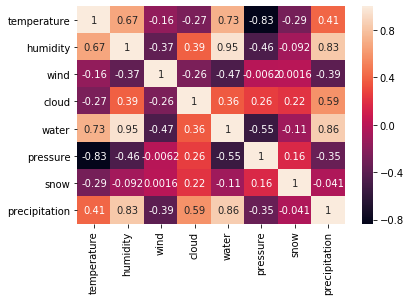

--------------------
--------------------
Geohash: 9u
 


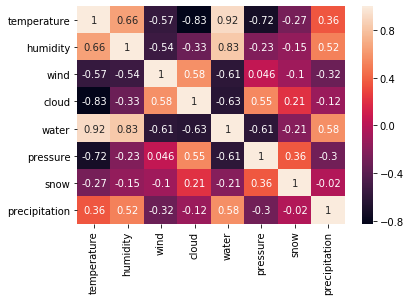

--------------------
--------------------
Geohash: b8
 


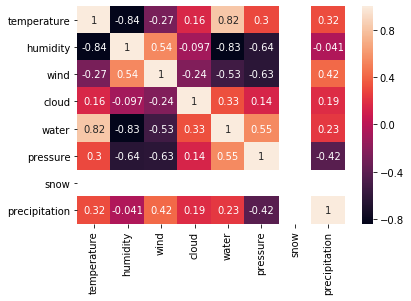

--------------------
--------------------
Geohash: b9
 


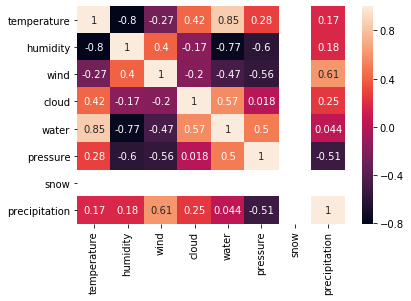

--------------------
--------------------
Geohash: dn
 


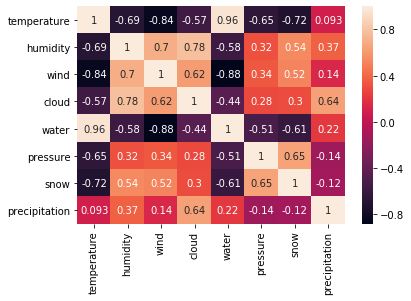

--------------------
--------------------
Geohash: f6
 


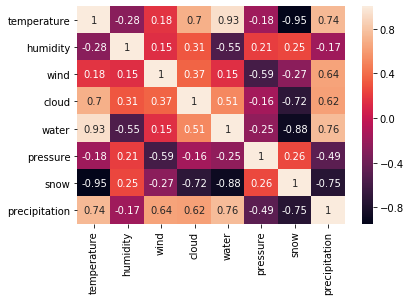

--------------------
--------------------
Geohash: f9
 


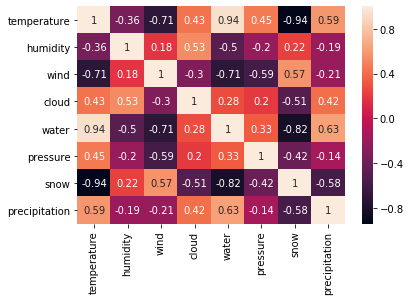

--------------------
--------------------
Geohash: fc
 


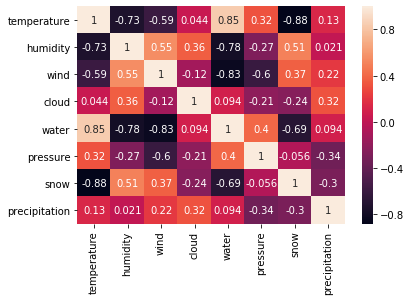

--------------------
--------------------
Geohash: fd
 


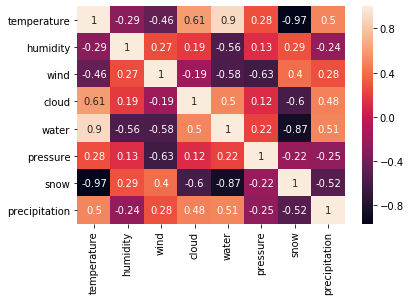

--------------------


In [3]:
#Anser Question2: correlation matrix 
#Time cost: 10 min

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt


for key in temperature_array.keys():
    data = {'temperature': temperature_array[key],
            'humidity': humidity_array[key],
            'wind': wind_speed_array[key],
            'cloud': cloud_cover_array[key],
            'water': precipitable_water_entire_atmosphere_single_layer_array[key],
            'pressure': pressure_surface_array[key],
            'snow': snow_depth_surface_array[key],
            'precipitation': total_precipitation_surface_3_hour_accumulation_array[key]
            }

    df = pd.DataFrame(data, columns=['temperature','humidity','wind','cloud','water', 'pressure', 'snow', 'precipitation'])

    corrMatrix = df.corr()
    print ('--------------------')
    print ('Geohash: ' + key)
    print (' ')
    #print (corrMatrix)
    
    #Get the visualized matrix
    sn.heatmap(corrMatrix, annot=True)
    plt.show()
    #plt
    print ('--------------------')

In [ ]:
#Anser Question3: conclusions 
'''
From the correlation matrix above, we can find that for most regins(geohashs),
the temperature is related to the snow_depth and precipitable_water. 
And for some regions like "b9", the temperature is also related to the humidity.
But if you look at the matrix of "fd" and "f6", you can find that for these regions, we can not find a clear
relationship between temperature and humidity.

It means that the correlations between different parameters are different based on the region.
So for a specific region, if you want to predict some values based on some other values, you need to study on 
this region's data and find out the relevant parameters to get a valid and accurate prediction.
'''